In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("/kaggle/input/algorithmic-trading-strategy/AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
Date,,,,,,
2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700
...,...,...,...,...,...,...
2020-05-18,313.170013,316.500000,310.320007,314.959991,314.959991,33843100
2020-05-19,315.029999,318.519989,313.010010,313.140015,313.140015,25432400
2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200


In [2]:
# Calculate moving averages
data['SMA30'] = data['Adj Close Price'].rolling(window=30).mean()
data['SMA100'] = data['Adj Close Price'].rolling(window=100).mean()
data

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume,SMA30,SMA100
Date,,,,,,,,
2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500,NaN,NaN
2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400,NaN,NaN
2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500,NaN,NaN
2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200,NaN,NaN
2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-05-18,313.170013,316.500000,310.320007,314.959991,314.959991,33843100,287.864806,289.734840
2020-05-19,315.029999,318.519989,313.010010,313.140015,313.140015,25432400,289.577426,290.037927
2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200,291.594106,290.345799


In [3]:
# Calculate MACD
data['EMA12'] = data['Adj Close Price'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Adj Close Price'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume,SMA30,SMA100,EMA12,EMA26,MACD,Signal Line
Date,,,,,,,,,,,,
2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500,NaN,NaN,80.948952,80.948952,0.000000,0.000000
2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400,NaN,NaN,80.916703,80.933425,-0.016722,-0.003344
2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500,NaN,NaN,81.115746,81.028021,0.087724,0.014869
2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200,NaN,NaN,81.236794,81.092802,0.143992,0.040694
2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700,NaN,NaN,81.252625,81.111091,0.141535,0.060862
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18,313.170013,316.500000,310.320007,314.959991,314.959991,33843100,287.864806,289.734840,304.315889,293.622641,10.693248,9.623201
2020-05-19,315.029999,318.519989,313.010010,313.140015,313.140015,25432400,289.577426,290.037927,305.673447,295.068373,10.605074,9.819575
2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200,291.594106,290.345799,307.759072,296.858124,10.900948,10.035850


In [4]:
def buySell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA30'].iloc[i] > data['SMA100'].iloc[i] and data['MACD'].iloc[i] > data['Signal Line'].iloc[i] :
            if flag != 1:
                sigPriceBuy.append(data['Adj Close Price'].iloc[i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'].iloc[i] < data['SMA100'].iloc[i] and data['MACD'].iloc[i] < data['Signal Line'].iloc[i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Adj Close Price'].iloc[i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return sigPriceBuy, sigPriceSell

signals = buySell(data)
data['Buy Signal Price'] = signals[0]
data['Sell Signal Price'] = signals[1]
data

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume,SMA30,SMA100,EMA12,EMA26,MACD,Signal Line,Buy Signal Price,Sell Signal Price
Date,,,,,,,,,,,,,,
2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500,NaN,NaN,80.948952,80.948952,0.000000,0.000000,NaN,NaN
2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400,NaN,NaN,80.916703,80.933425,-0.016722,-0.003344,NaN,NaN
2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500,NaN,NaN,81.115746,81.028021,0.087724,0.014869,NaN,NaN
2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200,NaN,NaN,81.236794,81.092802,0.143992,0.040694,NaN,NaN
2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700,NaN,NaN,81.252625,81.111091,0.141535,0.060862,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18,313.170013,316.500000,310.320007,314.959991,314.959991,33843100,287.864806,289.734840,304.315889,293.622641,10.693248,9.623201,NaN,NaN
2020-05-19,315.029999,318.519989,313.010010,313.140015,313.140015,25432400,289.577426,290.037927,305.673447,295.068373,10.605074,9.819575,NaN,NaN
2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200,291.594106,290.345799,307.759072,296.858124,10.900948,10.035850,319.230011,NaN


In [5]:
# Debugging prints for signals
print(data[['Adj Close Price', 'SMA30', 'SMA100', 'MACD', 'Signal Line', 'Buy Signal Price', 'Sell Signal Price']].tail(10))

            Adj Close Price       SMA30      SMA100       MACD  Signal Line  \
Date                                                                          
2020-05-11       315.010010  277.256215  288.187204  10.428702     7.437961   
2020-05-12       311.410004  279.165812  288.511395  10.870410     8.124451   
2020-05-13       307.649994  280.967362  288.804652  10.792654     8.658091   
2020-05-14       309.540009  283.276708  289.114024  10.759511     9.078375   
2020-05-15       307.709991  285.391415  289.410867  10.464944     9.355689   
2020-05-18       314.959991  287.864806  289.734840  10.693248     9.623201   
2020-05-19       313.140015  289.577426  290.037927  10.605074     9.819575   
2020-05-20       319.230011  291.594106  290.345799  10.900948    10.035850   
2020-05-21       316.850006  293.310716  290.630966  10.818673    10.192415   
2020-05-22       318.890015  295.031499  290.919420  10.793659    10.312664   

            Buy Signal Price  Sell Signal Price  
D

In [6]:
# Backtesting
initial_investment = 10000
data['Position'] = np.nan

In [7]:
 #Fill the Position column using .iloc for access and .loc for setting values
for i in range(len(data)):
    if not np.isnan(data['Buy Signal Price'].iloc[i]):
        data.loc[data.index[i], 'Position'] = 1
    elif not np.isnan(data['Sell Signal Price'].iloc[i]):
        data.loc[data.index[i], 'Position'] = 0
    else:
        if i == 0:
            data.loc[data.index[i], 'Position'] = 0
        else:
            data.loc[data.index[i], 'Position'] = data.loc[data.index[i-1], 'Position']

# Debugging prints for positions
print(data[['Adj Close Price', 'Position']].tail(30))

            Adj Close Price  Position
Date                                 
2020-04-13       272.512329       0.0
2020-04-14       286.275055       0.0
2020-04-15       283.662140       0.0
2020-04-16       285.916046       0.0
2020-04-17       282.036530       0.0
2020-04-20       276.182373       0.0
2020-04-21       267.645477       0.0
2020-04-22       275.354614       0.0
2020-04-23       274.287506       0.0
2020-04-24       282.206085       0.0
2020-04-27       282.405548       0.0
2020-04-28       277.827911       0.0
2020-04-29       286.953247       0.0
2020-04-30       293.006836       0.0
2020-05-01       288.289612       0.0
2020-05-04       292.368561       0.0
2020-05-05       296.756683       0.0
2020-05-06       299.818390       0.0
2020-05-07       302.919983       0.0
2020-05-08       310.130005       0.0
2020-05-11       315.010010       0.0
2020-05-12       311.410004       0.0
2020-05-13       307.649994       0.0
2020-05-14       309.540009       0.0
2020-05-15  

In [8]:
# Calculate daily returns and strategy returns
data['Daily Return'] = data['Adj Close Price'].pct_change(fill_method=None)
data['Strategy Return'] = data['Position'].shift(1) * data['Daily Return']

# Calculate cumulative returns
backtest = pd.DataFrame()
backtest['Cumulative Strategy Return'] = (data['Strategy Return'] + 1).cumprod() * initial_investment

In [9]:
# Fill any missing values for correct calculation
backtest = backtest.ffill().bfill()

# Debugging prints for returns
print(backtest.tail(30))

            Cumulative Strategy Return
Date                                  
2020-04-13                21049.744706
2020-04-14                21049.744706
2020-04-15                21049.744706
2020-04-16                21049.744706
2020-04-17                21049.744706
2020-04-20                21049.744706
2020-04-21                21049.744706
2020-04-22                21049.744706
2020-04-23                21049.744706
2020-04-24                21049.744706
2020-04-27                21049.744706
2020-04-28                21049.744706
2020-04-29                21049.744706
2020-04-30                21049.744706
2020-05-01                21049.744706
2020-05-04                21049.744706
2020-05-05                21049.744706
2020-05-06                21049.744706
2020-05-07                21049.744706
2020-05-08                21049.744706
2020-05-11                21049.744706
2020-05-12                21049.744706
2020-05-13                21049.744706
2020-05-14               

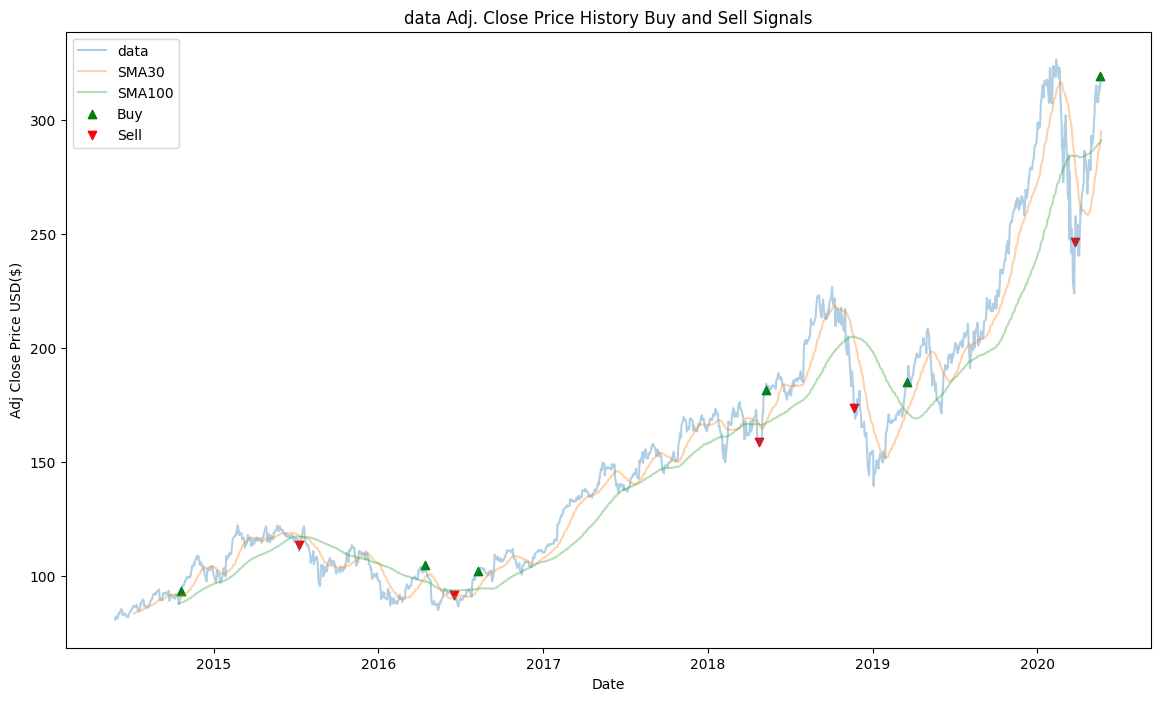

In [10]:
# Visualization
plt.figure(figsize=(14, 8))
plt.plot(data['Adj Close Price'], label='data', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell Signal Price'], label='Sell', marker='v', color='red')
plt.title('data Adj. Close Price History Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left')
plt.show()


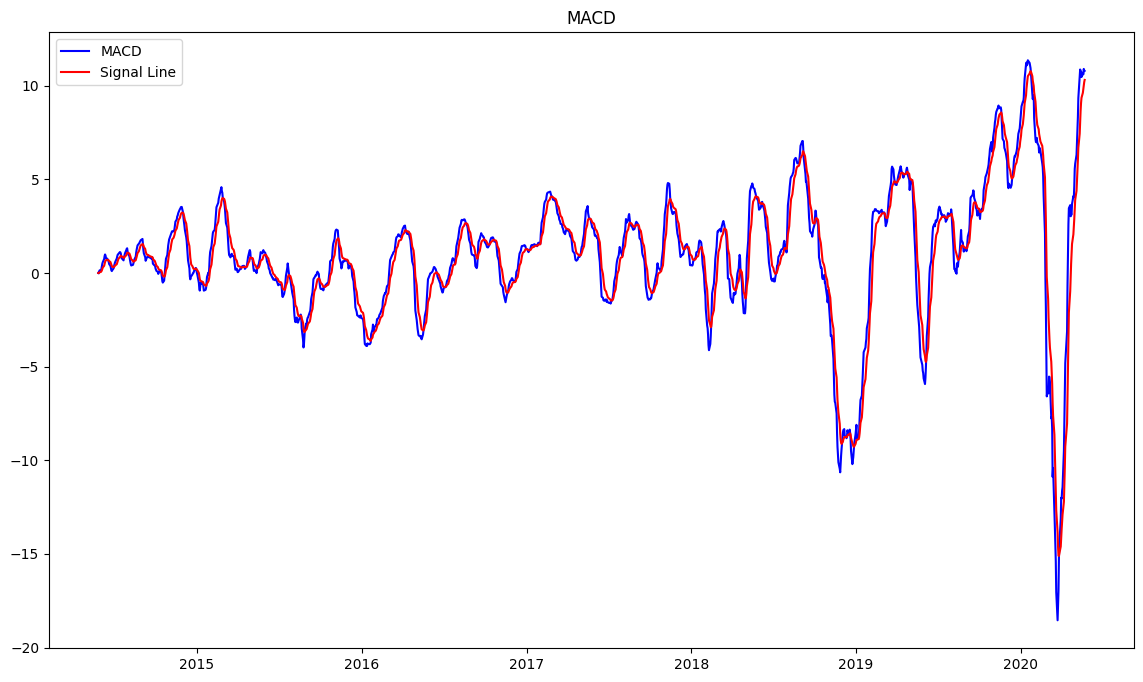

In [11]:
# Plot MACD
plt.figure(figsize=(14, 8))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal Line'], label='Signal Line', color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

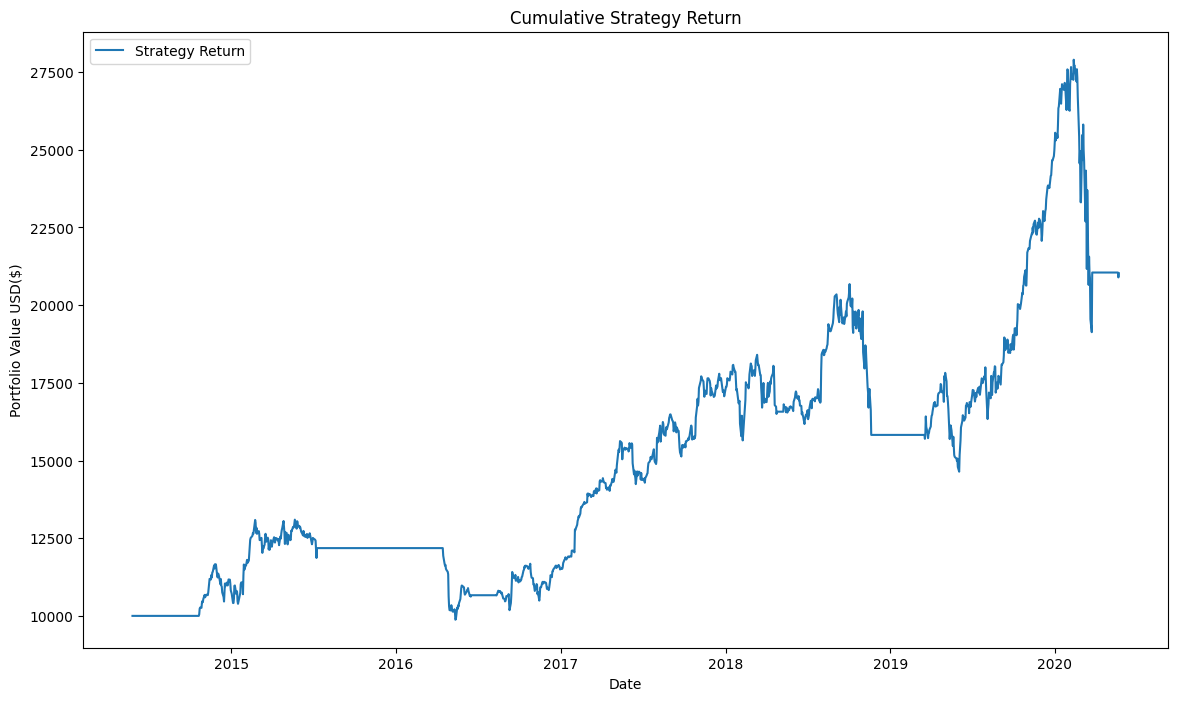

In [12]:
# Plot cumulative returns
plt.figure(figsize=(14, 8))
plt.plot(backtest['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Cumulative Strategy Return')
plt.xlabel('Date')
plt.ylabel('Portfolio Value USD($)')
plt.legend(loc='upper left')
plt.show()



In [13]:
# Performance metrics
total_return = backtest['Cumulative Strategy Return'].iloc[-1] - initial_investment
annualized_return = (backtest['Cumulative Strategy Return'].iloc[-1] / initial_investment) ** (252 / len(backtest)) - 1
annualized_volatility = data['Strategy Return'].std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

print(f"Total Return: ${total_return:.2f}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Total Return: $11027.33
Annualized Return: 13.21%
Annualized Volatility: 22.28%
Sharpe Ratio: 0.59


In [14]:
# Detailed trade analysis
trade_data = data[['Adj Close Price', 'Buy Signal Price', 'Sell Signal Price', 'Position']].dropna()
print(trade_data.head(20))  # Print the first 20 rows of the trade data
print(trade_data.tail(20))  # Print the last 20 rows of the trade data

Empty DataFrame
Columns: [Adj Close Price, Buy Signal Price, Sell Signal Price, Position]
Index: []
Empty DataFrame
Columns: [Adj Close Price, Buy Signal Price, Sell Signal Price, Position]
Index: []
